<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/re_scaling%2BtensorRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [91]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/sample_submission.csv')

In [92]:
thresholds = [0, 1000, 1600, 2000, float('inf')]
categories = ['light', 'small', 'medium', 'large']
train['size'] = pd.cut(train['배기량'], bins=thresholds, labels=categories, right=False)

In [93]:
thresholds = [0, 1000, 1600, 2000, float('inf')]
categories = ['light', 'small', 'medium', 'large']
test['size'] = pd.cut(test['배기량'], bins=thresholds, labels=categories, right=False)

In [94]:
train['Difference_year'] = train['생산년도'] - train['모델출시년도']
train.loc[train['Difference_year'] < 0, '생산년도'] = train.loc[train['Difference_year'] < 0, '모델출시년도']
train['Difference_year'] = train['생산년도'] - train['모델출시년도']

In [95]:
test['Difference_year'] = test['생산년도'] - test['모델출시년도']
test.loc[test['Difference_year'] < 0, '생산년도'] = test.loc[test['Difference_year'] < 0, '모델출시년도']
test['Difference_year'] = test['생산년도'] - test['모델출시년도']

In [7]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

In [8]:
!apt-get -qq install fonts-nanum
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


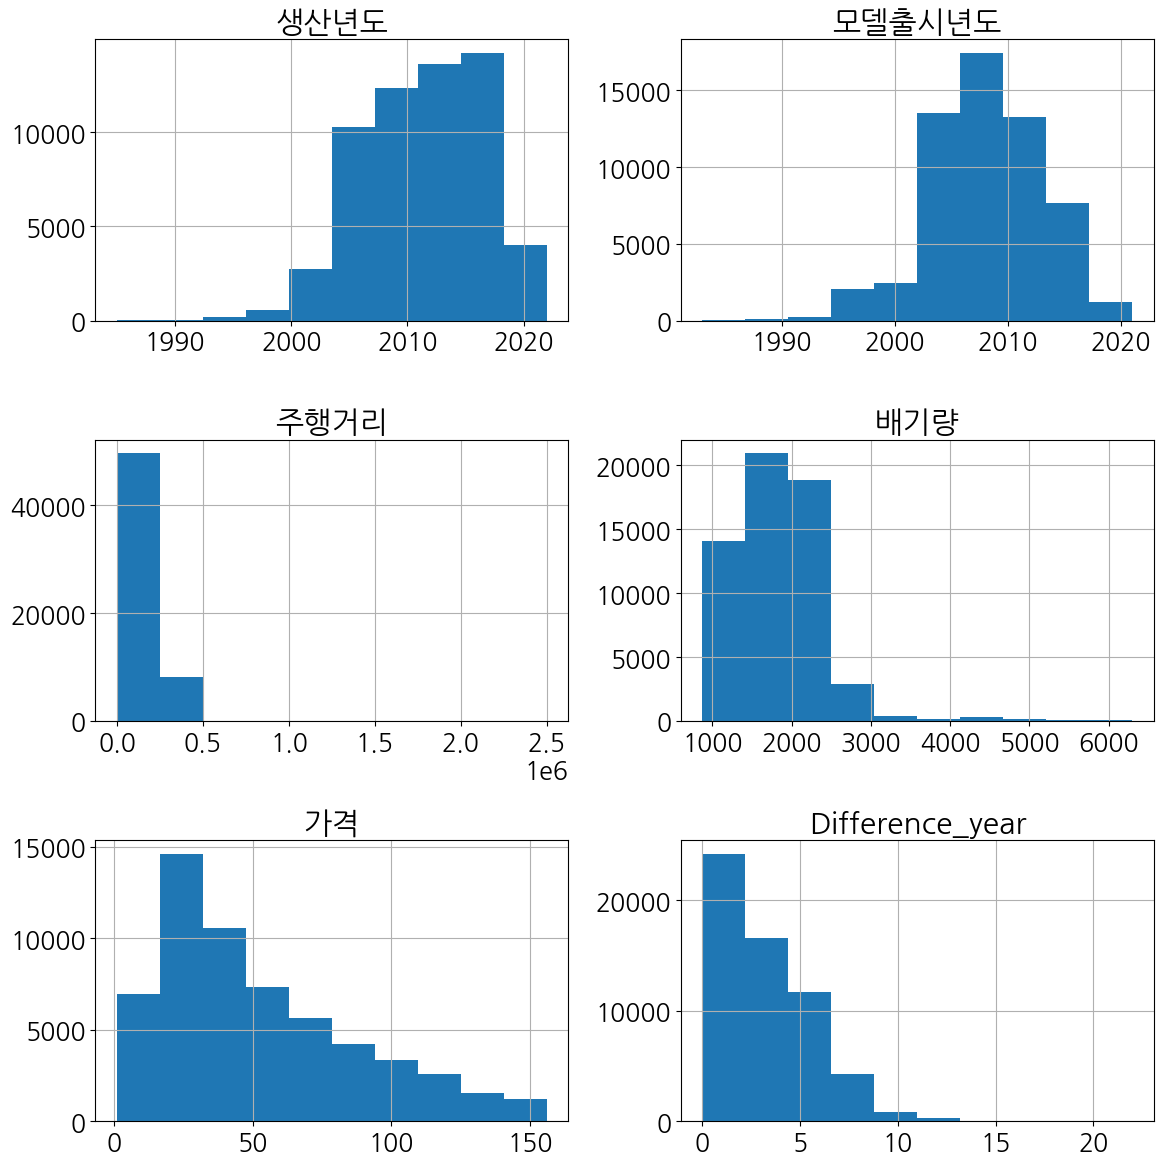

In [9]:
not_nominal = train[['생산년도','모델출시년도','주행거리','배기량','가격','Difference_year']]
not_nominal.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats import boxcox

In [11]:
columns_to_scale = ["생산년도", "모델출시년도", "주행거리", "배기량",'Difference_year']

In [18]:
# 1. MinMax scaling
scaler_minmax = MinMaxScaler()
train_minmax = train.copy()
train_minmax[columns_to_scale] = scaler_minmax.fit_transform(train[columns_to_scale])

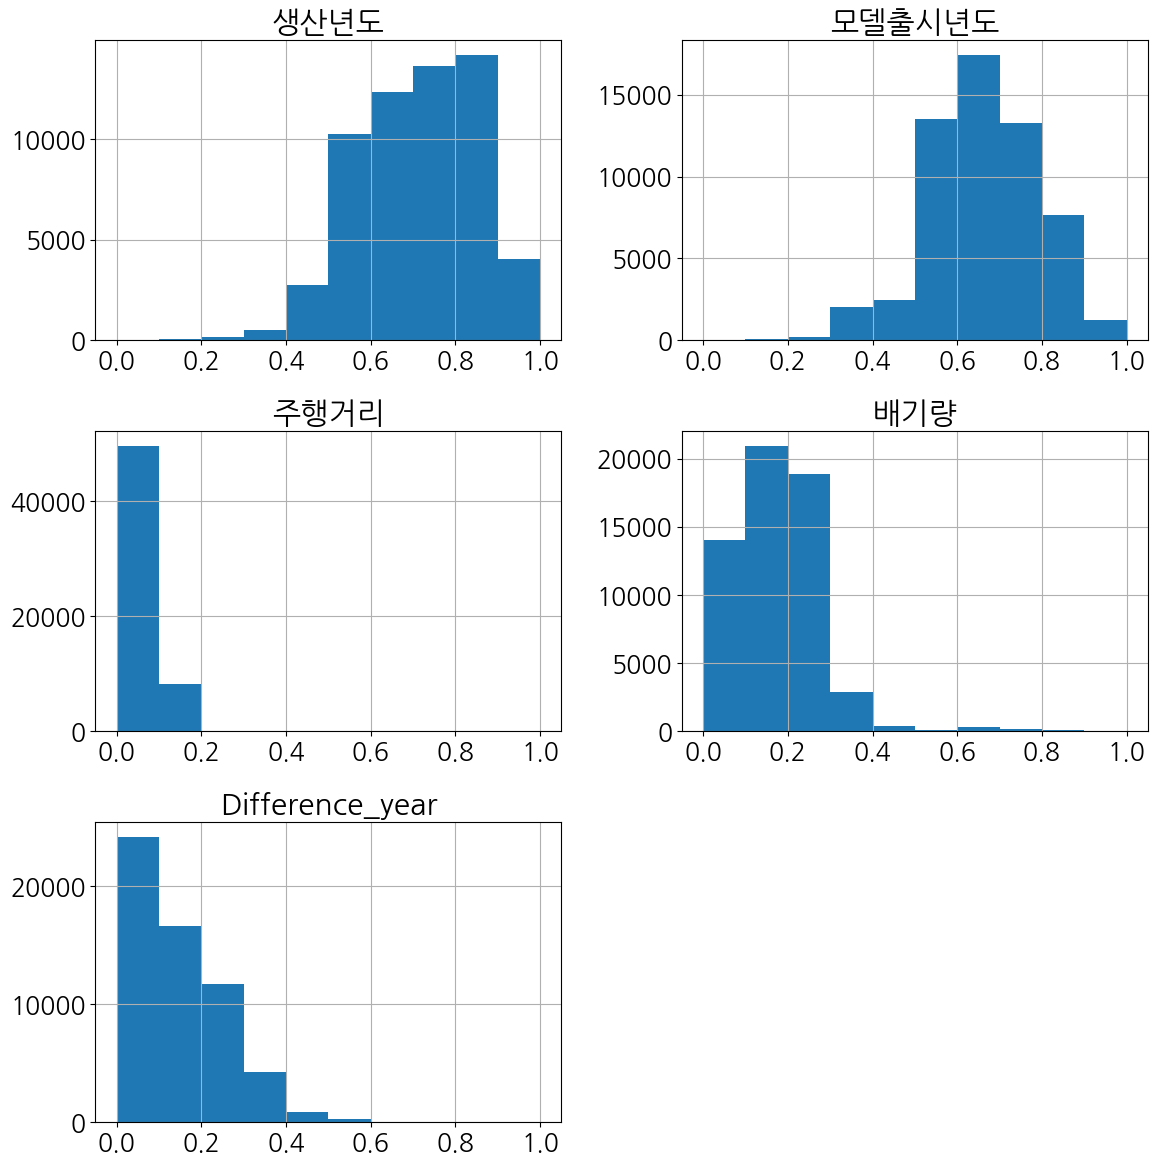

In [21]:
train_minmax[columns_to_scale].hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [22]:
# 2. Robust scaling
scaler_robust = RobustScaler()
train_robust = train.copy()
train_robust[columns_to_scale] = scaler_robust.fit_transform(train_robust[columns_to_scale])

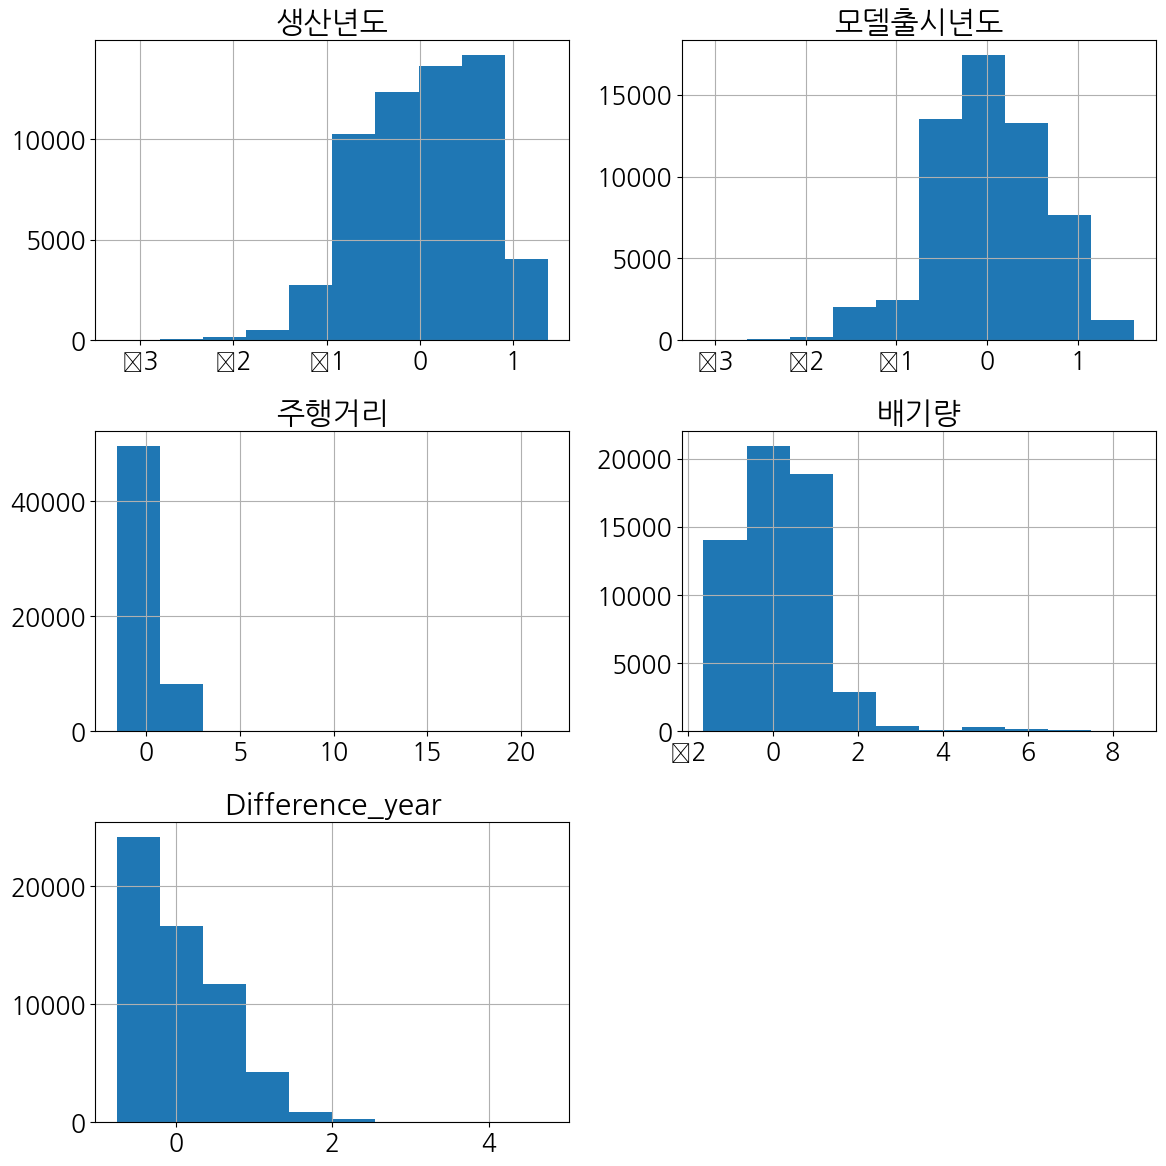

In [23]:
train_robust[columns_to_scale].hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [24]:
# 3. Log scaling
train_log = train.copy()
train_log[columns_to_scale] = np.log1p(train_log[columns_to_scale])

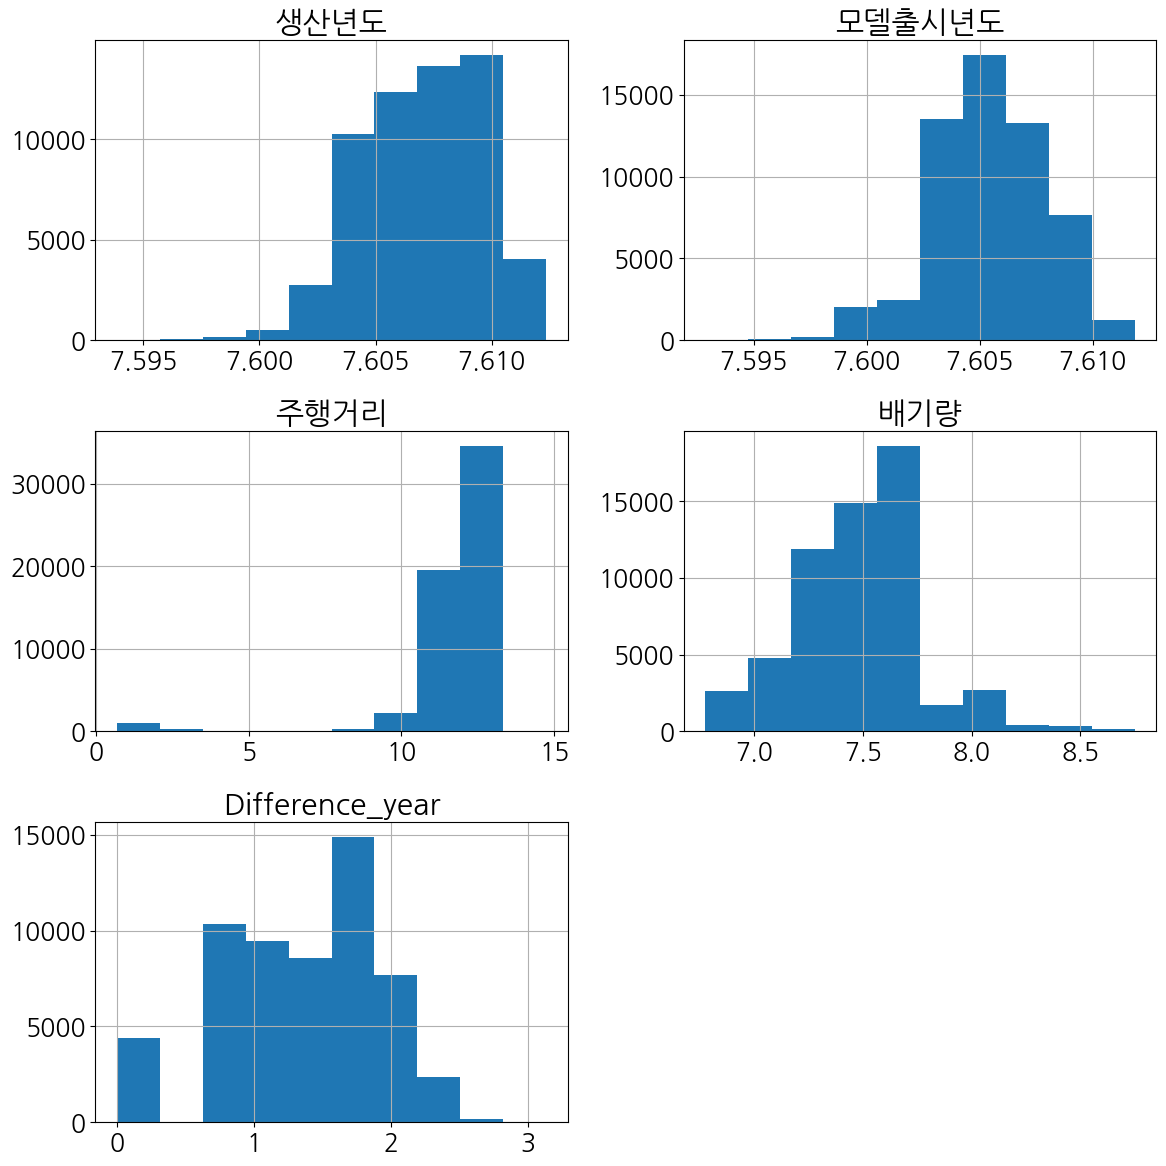

In [25]:
train_log[columns_to_scale].hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [33]:
# 4. Box-Cox scaling
train_boxcox = train[columns_to_scale].copy()
for column in columns_to_scale:
    transformed_data, _ = boxcox(train_boxcox[column] + 1)  # Add 1 to avoid issues with zero or negative values
    train_boxcox[column] = transformed_data

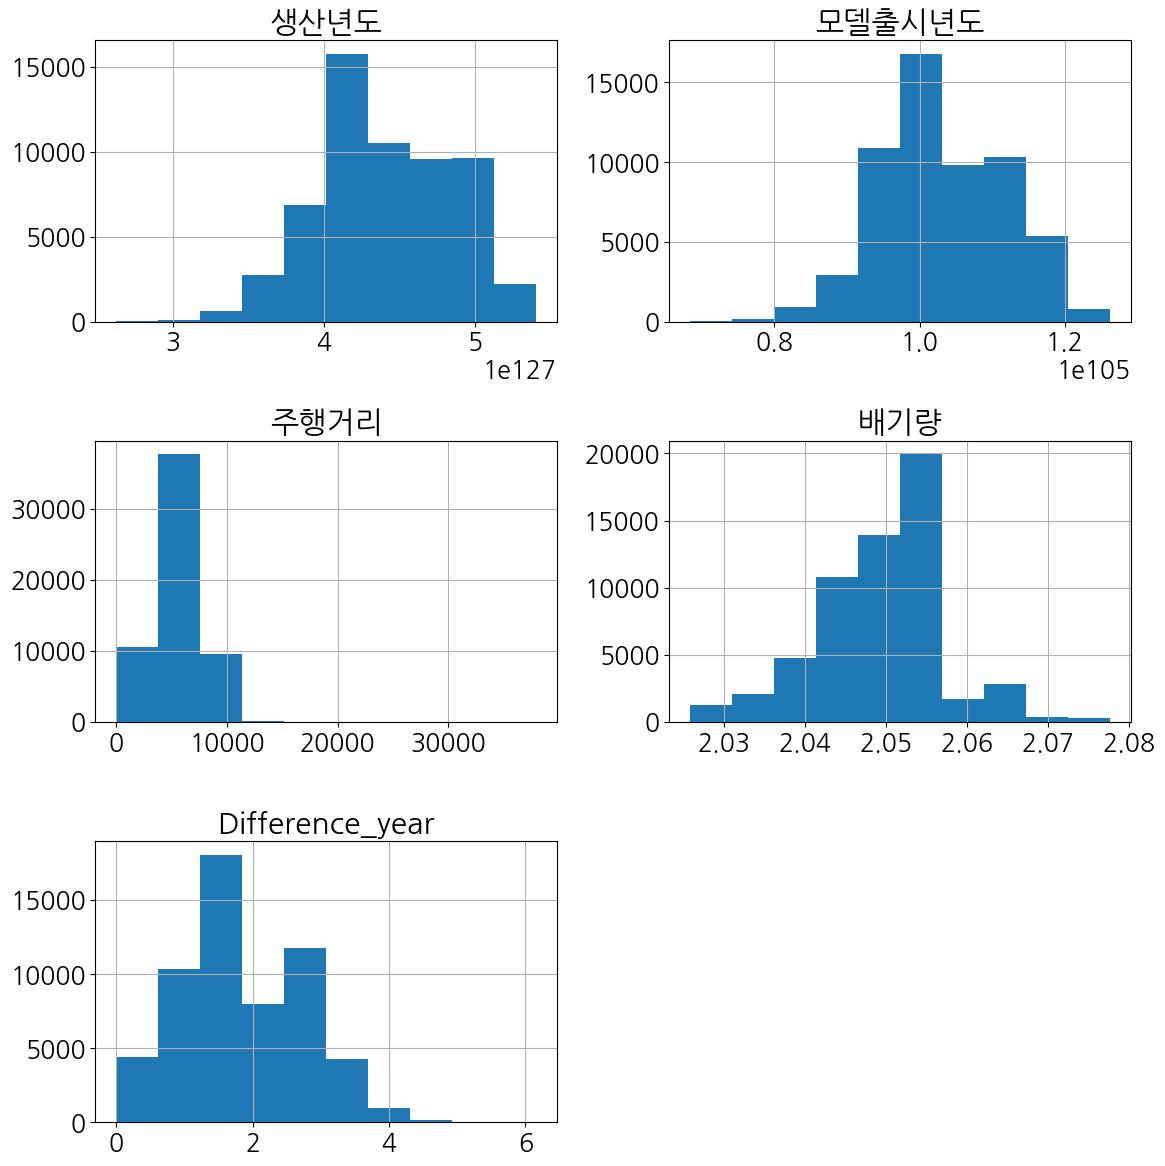

In [35]:
train_boxcox.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [28]:
# 5. Root scaling
train_root = train.copy()
train_root[columns_to_scale] = np.sqrt(train_root[columns_to_scale])

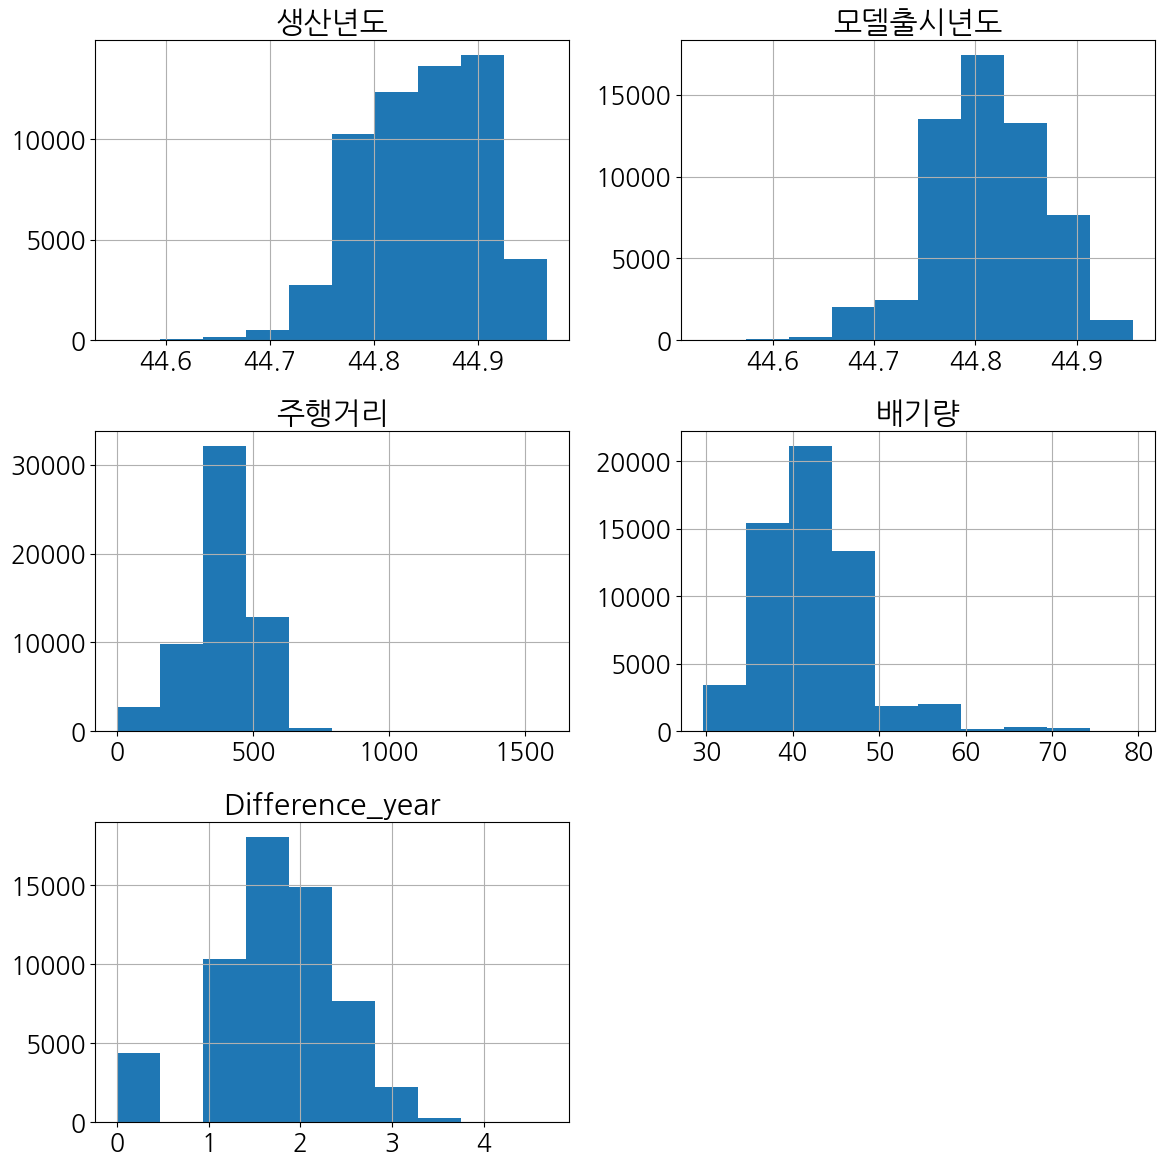

In [31]:
train_root[columns_to_scale].hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [30]:
# 6. Standard scaling
scaler_standard = StandardScaler()
train_standard = train.copy()
train_standard[columns_to_scale] = scaler_standard.fit_transform(train_standard[columns_to_scale])

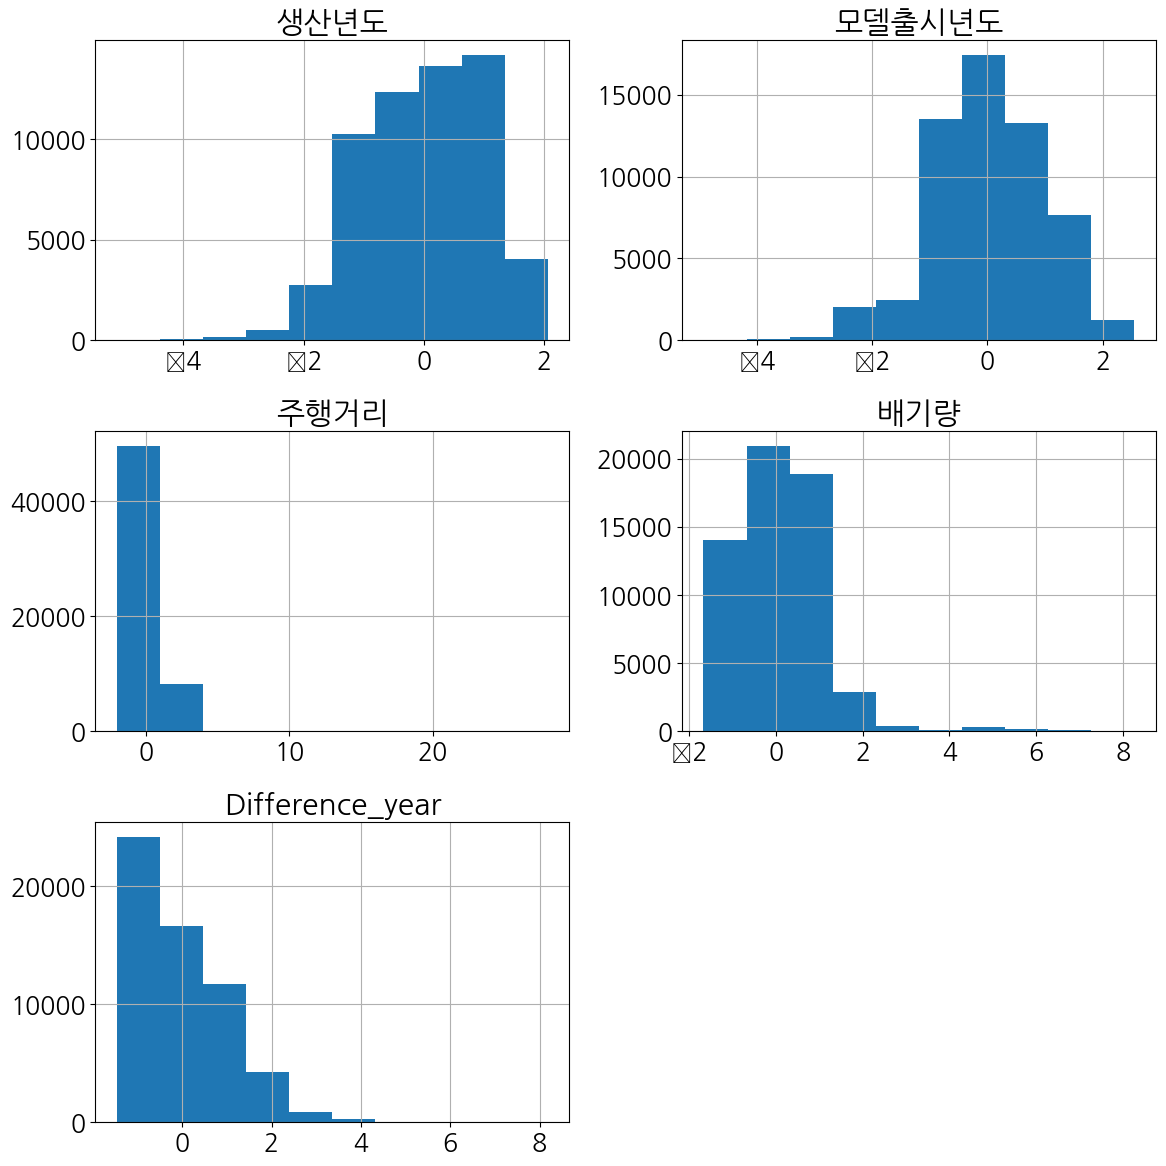

In [32]:
train_standard[columns_to_scale].hist(figsize = (12,12))
plt.tight_layout()
plt.show()

In [96]:
columns_to_scale = ["생산년도", "모델출시년도", "주행거리", "배기량",'Difference_year']

In [97]:
train[columns_to_scale] = np.log1p(train[columns_to_scale])
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,size,Difference_year
0,TRAIN_00000,7.610358,7.608374,skoda,fabia,KAT,SLA,11.353132,6.907755,0,0,1,0,0,51.74,light,1.609438
1,TRAIN_00001,7.606387,7.604396,toyota,auris,RKO,SWI,11.813037,7.377134,0,0,1,0,0,41.47,small,1.609438
2,TRAIN_00002,7.602401,7.602401,mercedes-benz,clk-klasa,GNI,WIE,12.449897,7.493874,0,0,1,0,0,17.81,medium,0.000000
3,TRAIN_00003,7.604396,7.601902,nissan,x-trail,EHX,WIE,12.380030,7.689371,0,1,0,0,0,18.20,large,1.791759
4,TRAIN_00004,7.604894,7.604894,fiat,bravo,OSW,MAL,12.433212,7.555382,0,1,0,0,0,17.55,medium,0.000000


In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
ordinal_features = ['브랜드', '차량모델명', '판매도시', '판매구역','size']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [41]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


In [42]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from scipy.optimize import minimize

In [100]:
X = train.drop(['ID', '가격'], axis=1)
y = train['가격']

In [101]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
gbrt_params = {'n_estimators': 489, 'learning_rate': 0.037666299375964746, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'subsample': 0.994817517319318}

In [75]:
xgb_params = {'booster': 'gbtree', 'eta': 0.09773787198485948, 'max_depth': 10, 'subsample': 0.6537116324250624, 'colsample_bytree': 0.9736768668296801, 'lambda': 2.571247074857165, 'alpha': 3.739545080324916e-05}

In [76]:
cat_params = {'boosting_type': 'Plain', 'iterations': 1674, 'learning_rate': 0.10573424441351864, 'depth': 8, 'l2_leaf_reg': 0.00026060065975250495, 'random_strength': 1.8409010826838174e-05, 'bagging_temperature': 0.01757564674119713, 'border_count': 113}

In [77]:
lgb_params =  {'num_leaves': 96, 'learning_rate': 0.09833136097882149, 'feature_fraction': 0.933552804860751, 'bagging_fraction': 0.7528646718210341, 'bagging_freq': 7, 'lambda_l1': 4.485925018221742, 'lambda_l2': 0.00010634446495247863}

In [78]:
rf_params =  {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}

In [80]:
gbrt_model = GradientBoostingRegressor(**gbrt_params)
xgb_model = xgb.XGBRegressor(**xgb_params)
catboost_model = CatBoostRegressor(**cat_params)
lgbm_model = lgb.LGBMRegressor(**lgb_params)
rf_model = RandomForestRegressor(**rf_params)
svr_model = SVR()
lasso_model = Lasso()
ridge_model = Ridge()

In [102]:
xgboost_model = xgb_model.fit(X_train, y_train)
lightgb_model = lgbm_model.fit(X_train, y_train)
catboost_model = catboost_model.fit(X_train,y_train)
rf_model = rf_model.fit(X_train,y_train)
svr_model = svr_model.fit(X_train, y_train)
lasso_model = lasso_model.fit(X_train, y_train)
ridge_model = ridge_model.fit(X_train, y_train)
gbrt_model.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=4.485925018221742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.485925018221742
[LightGBM] [Warning] feature_fraction is set=0.933552804860751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.933552804860751
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.00010634446495247863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010634446495247863
[LightGBM] [Warning] bagging_fraction is set=0.7528646718210341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7528646718210341
0:	learn: 32.5517239	total: 63.7ms	remaining: 1m 46s
1:	learn: 30.0354219	total: 73.8ms	remaining: 1m 1s
2:	learn: 27.8801088	total: 89.2ms	remaining: 49.7s
3:	learn: 25.9777694	total: 106ms	remaining: 44.5s
4:	learn: 24.2556166	total: 117ms	remaining: 39.1s
5:	learn: 22.8074146	total: 127ms	remaining: 35.3s
6:	learn: 

GradientBoostingRegressor(learning_rate=0.037666299375964746, max_depth=10,
                          max_features='sqrt', min_samples_split=9,
                          n_estimators=489, subsample=0.994817517319318)

In [103]:
#gbrt
pred = gbrt_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("gb_mae :", mae)

#lgb
pred = lightgb_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("lgb_mae :", mae)

#xgb
pred = xgb_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("xgb_mae :", mae)

#cat
pred = catboost_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("cat_mae :", mae)

#RF
pred = rf_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("RF_mae :", mae)

#svr
pred = svr_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("svr_mae :", mae)

#ridge
pred = ridge_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("ridge_mae :", mae)

#Lasso
pred = lasso_model.predict(X_valid)
mae = mean_absolute_error(y_valid, pred)
print("lasso_mae : ", mae)

gb_mae : 5.86089111645712
lgb_mae : 6.231397954312549
xgb_mae : 6.045105445943155
cat_mae : 5.881045326067503
RF_mae : 7.579724665942079
svr_mae : 27.660413933190256
ridge_mae : 19.497702442730727
lasso_mae :  24.693774976665054


In [104]:
def blended_predictions(X, weights):
    a, b, c, d = weights
    return ((a * catboost_model.predict(X)) +\
            (b * xgboost_model.predict(X)) +\
            (c * lightgb_model.predict(X)) +\
            (d * gbrt_model.predict(X)))

In [105]:
def mae_loss(weights):
    pred = blended_predictions(X_valid, weights)
    return mean_absolute_error(y_valid, pred)

In [106]:
initial_weights = [0.25, 0.25, 0.25, 0.25]

In [107]:
result = minimize(mae_loss, initial_weights, method='Nelder-Mead')

In [108]:
optimal_weights = result.x
blended_pred = blended_predictions(X_valid, optimal_weights)

In [109]:
mae = mean_absolute_error(y_valid, blended_pred)
print("Optimal Weights:", optimal_weights)
print("Mean Absolute Error (MAE):", mae)

Optimal Weights: [ 0.43751147  0.1503554  -0.05546323  0.46452412]
Mean Absolute Error (MAE): 5.787621023501713


tensorflow_decision_forests

In [ ]:
!pip install tensorflow_decision_forests

In [138]:
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [146]:
X = train.drop(['ID'], axis=1)

In [147]:
X_train, X_valid = train_test_split(X, test_size=0.2, random_state=42)

In [163]:
train_data = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, task=tfdf.keras.Task.REGRESSION, label="가격")
valid_data = tfdf.keras.pd_dataframe_to_tf_dataset(X_valid, task=tfdf.keras.Task.REGRESSION, label="가격")

In [164]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

Use /tmp/tmppsj0eusr as temporary training directory


In [165]:
model.compile(metrics=["mean_absolute_error"])

In [166]:
model.fit(train_data)

Reading training dataset...
Training dataset read in 0:00:05.333524. Found 46336 examples.
Training model...
Model trained in 0:01:12.236452
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [168]:
results = model.evaluate(valid_data)

# Extract the mean absolute error
mae = mean_absolute_error(y_valid, model.predict(valid_data))
print("MAE on validation set:", mae)

12/12 [==============================] - 4s 235ms/step
MAE on validation set: 6.262524950008695
